In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('steel_strength_modified (1).csv')
df.head(10)

,Unnamed: 0,index,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,tensile strength
0,0,0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2473.5
1,1,1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1929.2
2,2,2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1871.8
3,3,3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2514.9
4,4,4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2315.0
5,5,5,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00,1779.5
6,6,6,0.00,0.05,0.05,0.01,18.10,3.60,0.01,0.00,0.01,13.00,0.00,0.11,2.25,2570.0
7,7,7,0.10,0.57,0.24,12.19,0.01,8.90,0.01,0.02,0.01,15.20,0.00,0.03,0.00,1795.6
8,8,8,0.01,0.01,1.99,17.50,2.10,0.02,0.01,0.00,0.01,11.80,0.00,0.03,0.05,1419.3
9,9,9,0.16,0.01,0.01,14.56,0.01,4.90,0.48,0.05,0.01,15.60,0.00,0.04,0.00,2008.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        311 non-null    int64  
 1   index             311 non-null    int64  
 2   c                 311 non-null    float64
 3   mn                311 non-null    float64
 4   si                311 non-null    float64
 5   cr                311 non-null    float64
 6   ni                311 non-null    float64
 7   mo                311 non-null    float64
 8   v                 311 non-null    float64
 9   n                 311 non-null    float64
 10  nb                311 non-null    float64
 11  co                311 non-null    float64
 12  w                 311 non-null    float64
 13  al                311 non-null    float64
 14  ti                311 non-null    float64
 15  tensile strength  311 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 39.0 

In [6]:
df.isnull().sum()

Unnamed: 0          0
index               0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
tensile strength    0
dtype: int64

# **Task 1 - Decision Rree Regression (5 points)**

You have the same dataset as in the previous homework. Make sure that it is clean and does not contain NaN, string values, and unreasonable values. Check it.

In [7]:
#put your code here
df.fillna(0,inplace=True)
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c                 311 non-null    float64
 1   mn                311 non-null    float64
 2   si                311 non-null    float64
 3   cr                311 non-null    float64
 4   ni                311 non-null    float64
 5   mo                311 non-null    float64
 6   v                 311 non-null    float64
 7   n                 311 non-null    float64
 8   nb                311 non-null    float64
 9   co                311 non-null    float64
 10  w                 311 non-null    float64
 11  al                311 non-null    float64
 12  ti                311 non-null    float64
 13  tensile strength  311 non-null    float64
dtypes: float64(14)
memory usage: 34.1 KB


<Axes: >

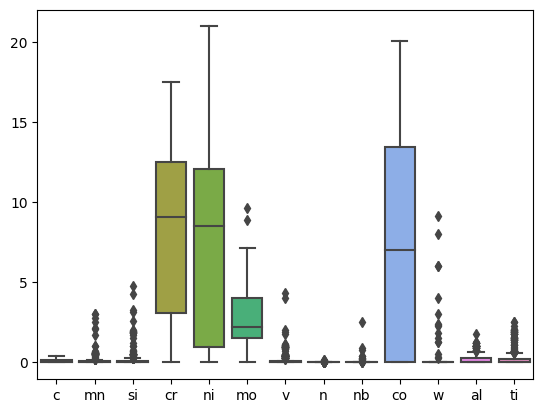

In [8]:
sns.boxplot(data=df.drop('tensile strength',axis=1))

Split your dataset in training(60%), validation(20%) and testing(20%) parts.

Build the decision tree model predicting tensile strength based on concentration of elements and show its metrics, such as MAE, MSE, R2







In [9]:
#put your code here
from sklearn.model_selection import train_test_split
# Assuming you have your dataset with features and target variable
# X - feature matrix (concentration of elements)
# y - target variable (tensile strength)
X = df.drop(['tensile strength'], axis=1)
y = df['tensile strength']

# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Building the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculating metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


Validation Set Metrics:
MAE: 110.44354838709678
MSE: 23802.770806451623
R2: 0.7654646674917485


What is the reasonable maximum depth of a decision tree? Choose the best max_depth parameter and explain the choice.*
Use training and validation subsets for this part.

*hint - you can plot r2 vs max_depth to do it. Try to use 'for' loop.

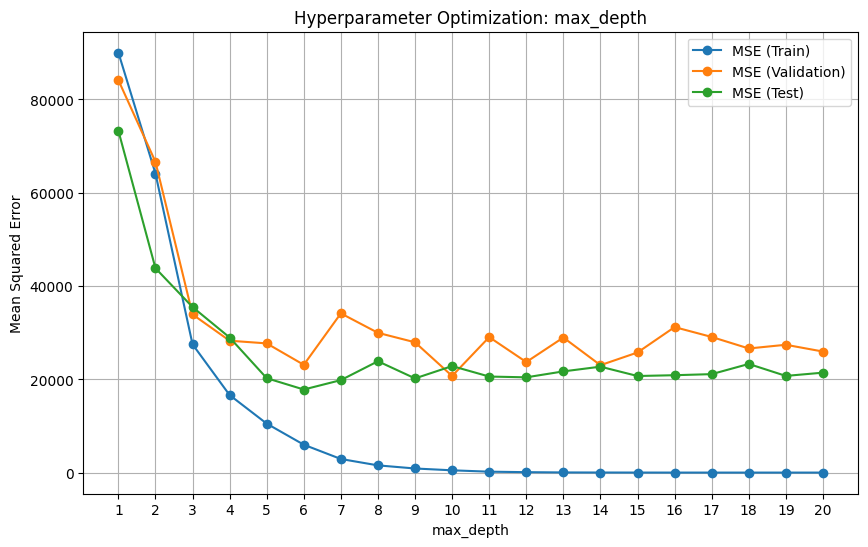

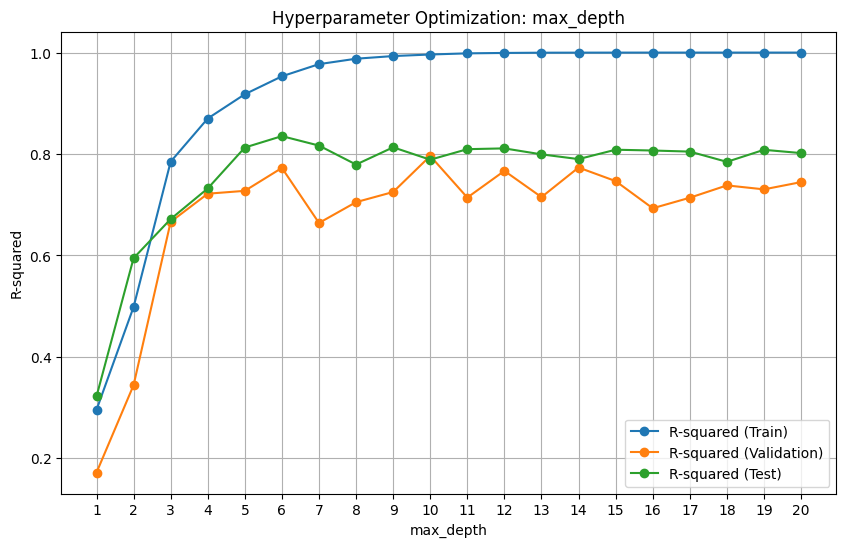

In [10]:
#put your code here
import numpy as np
# Define a range of max_depth values to try
max_depth_values = range(1, 21)
# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
mse_test_values = []
r2_test_values = []
# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    r2_test_values.append(r2_test)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.plot(max_depth_values, mse_test_values, 'o-', label='MSE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.plot(max_depth_values, r2_test_values, 'o-', label='R-squared (Test)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

Build a model with the best max_depth, and plot the predicted vs actual values. Analyze the distribution of predicted values. Is it similar to the distribution of values predicted with a linear regression model? Explain this.
Use test subset to answer these questions.


Mean Squared Error VALIDATION: 23341.317420616746
R-squared VALIDATION: 0.7700114962691152
Mean Squared Error TESTING: 20482.88176928812
R-squared TESTING: 0.8103156676179883


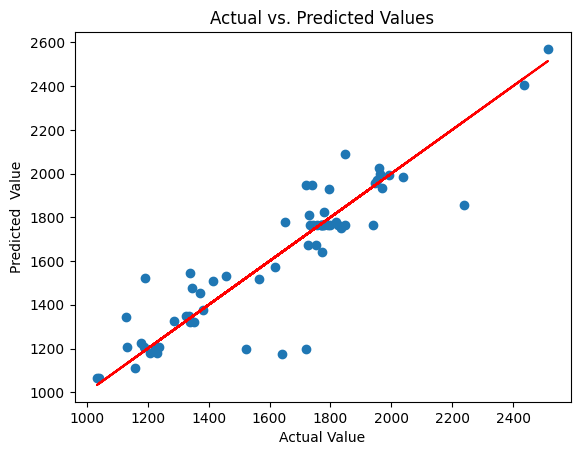

Mean Squared Error: 20482.88176928812
R-squared: 0.8103156676179883


In [11]:
#put your code here
# Train the model
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = model.predict(X_val)
# Calculate evaluation metrics on the validation set
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error VALIDATION:", mse)
print("R-squared VALIDATION:", r2)
# Make predictions on the TESTING set
y_pred = model.predict(X_test)
# Calculate evaluation metrics on the TESTING set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error TESTING:", mse)
print("R-squared TESTING:", r2)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
# Print metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Perform Feature Importance analysis of the Decision Tree model. Plot the result.

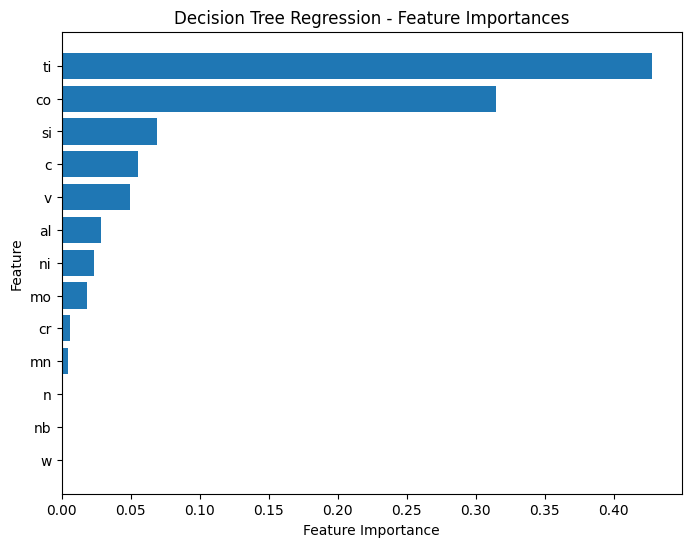

In [12]:
#put your code here
# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Regression - Feature Importances")
plt.show()

# **Task 2 - Random Forest Regression (5 points)**

Build a Random Forrest Regression model.

Mean Squared Error TRAIN: 3781.583319827943
R-squared TRAIN: 0.9703849585715779


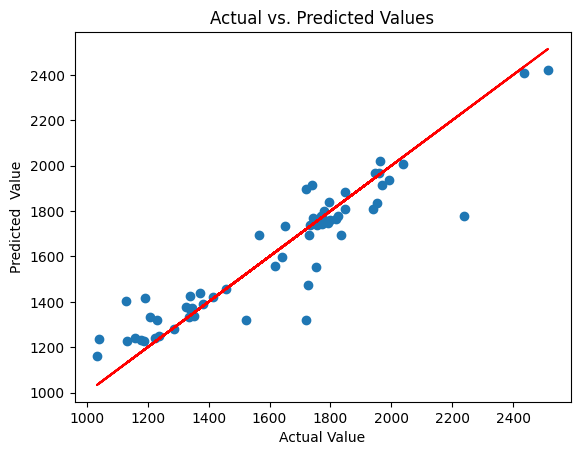

Mean Squared Error: 14928.083930984107
R-squared: 0.8617565796607257


In [13]:
#put your code here
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
# Create and train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the TRAIN set
y_pred = model.predict(X_train)

# Compute MSE and R-squared
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("R-squared TRAIN:", r2_train)


# Make predictions on the test set
y_pred = model.predict(X_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
# Print metrics
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


What are the best hyperparameters for this model? Optimize number of trees first, and then maximal depth of each tree. Use validation part of dataset for it. *hint - you can plot r2 vs hyperparameter to do it. Try to use 'for' loop.

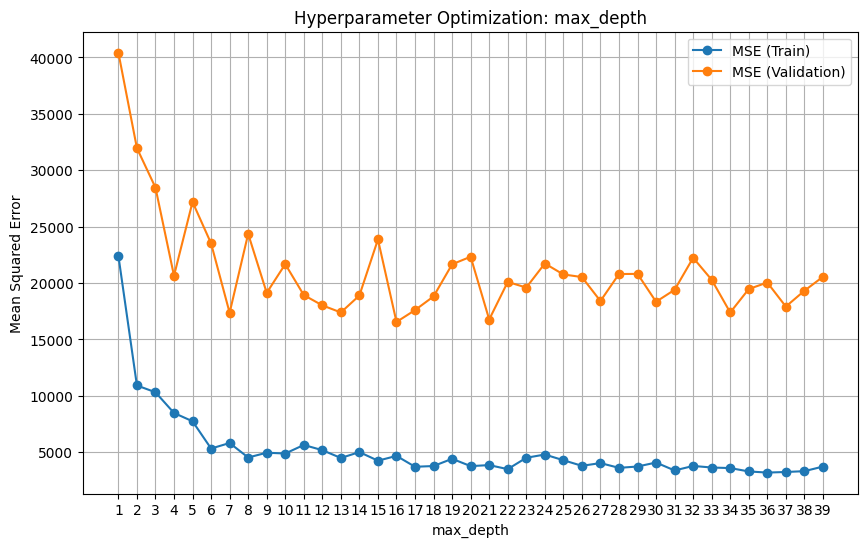

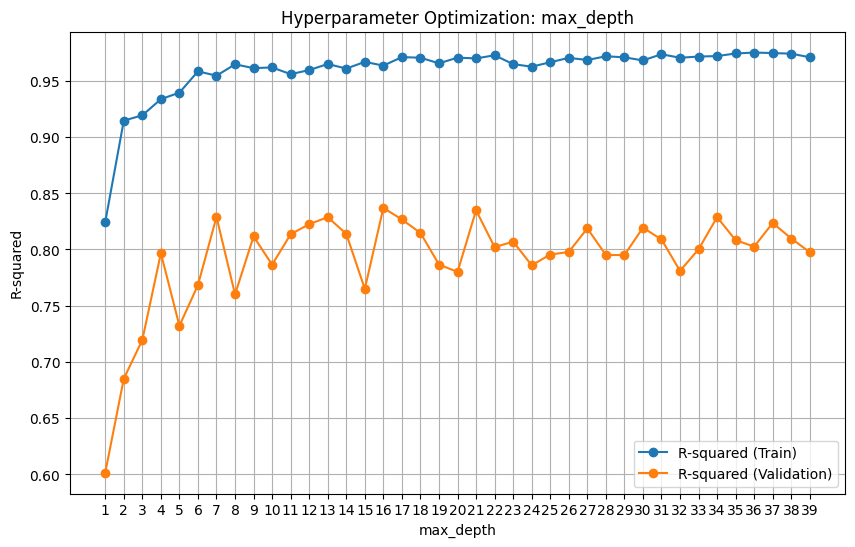

In [21]:
#put your code here
# Define a range of max_depth values to try
max_depth_values = range(1, 40)

# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
mse_test_values = []
r2_test_values = []

# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = RandomForestRegressor(n_estimators=max_depth)
    model.fit(X_train, y_train)

    # Make predictions on the train set
    y_train_pred = model.predict(X_train)

    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    r2_test_values.append(r2_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')

plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')

plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')

plt.xlabel('max_depth')
plt.ylabel('R-squared')

plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()


Build a model with the best hyperparameters, plot predicted vs actual tensile strength. What are the metrics of this model? Use test part of our dataset for this.

Mean Squared Error TRAIN: 3240.97921424874
R-squared TRAIN: 0.9746186383900703


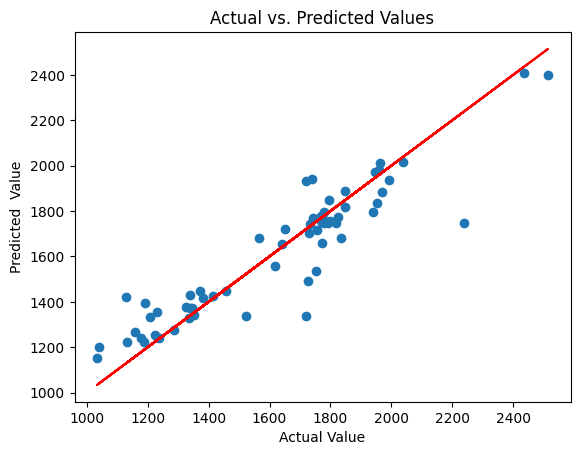

Mean Squared Error: 15883.505076135245
R-squared: 0.8529087806008598
bootstrap = True
ccp_alpha = 0.0
criterion = squared_error
max_depth = 16
max_features = 1.0
max_leaf_nodes = None
max_samples = None
min_impurity_decrease = 0.0
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
n_estimators = 100
n_jobs = None
oob_score = False
random_state = None
verbose = 0
warm_start = False


In [17]:
#put your code here
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
# Create and train the Random Forest regression model
model = RandomForestRegressor(max_depth=16)
model.fit(X_train, y_train)
# Make predictions on the TRAIN set
y_pred = model.predict(X_train)
# Compute MSE and R-squared
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("R-squared TRAIN:", r2_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
# Print metrics
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)
# Access the parameters of the model
params = model.get_params()
# Display the parameters
for param, value in params.items():
    print(param, "=", value)

Make a Feature Importance analysis of the Random Forrest model. Plot and analyze the result.

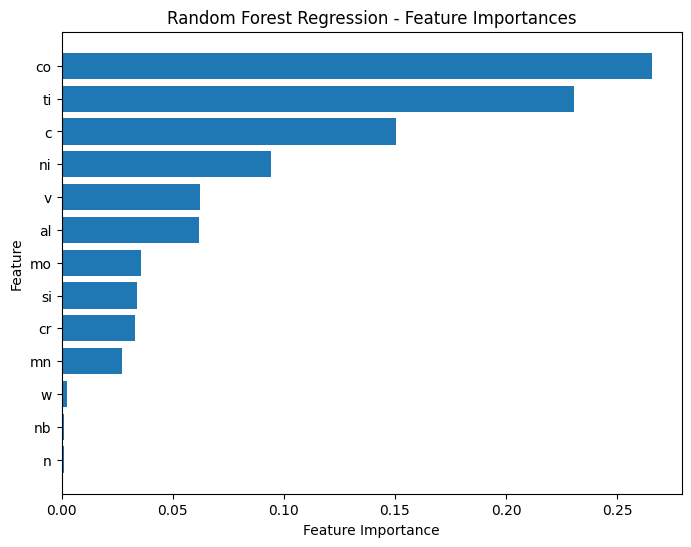

In [19]:
#put your code here

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Regression - Feature Importances")
plt.show()


# **Task 3. Compare the results and suggest the best model (4 points)**



You build 3 types of models: regularized linear regression (LASSO, see previous Homework), Decision Tree regression and Random Forest regression. Rank the models by by their performance.  Which elements affect mechanical properties the most? Write down 3 the most important elements in each model. Which model should be used to predict the tensile strength of novel steels? What will be your recomendations, if composition of new steel will be out of range of values in our trainig dataset?

1.For this case, i think Random Forest is better than Decision Tree and Lasso.


2.FOR LASSO: C, Ti, Co
For Decision Tree: Ti, C, V
For Random Forest: Co, Ti, C (descending order)

3. I think Random forest regression should be recruited.

4. For my recommendations. i think random forest should be better because it can prevent more overfitting than decision tree when algorithms captures the noises in the data.